In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h1>EDA</h1>

- **Cargamos el dataframe de hechos,** desarrollado en "ETL_hechos_homicidios.ipynb":

In [2]:
# Cargamos el dataframe de hechos:
hechos_df = pd.read_csv(r"Archivos producidos/hechos_homicidios.csv")

In [3]:
# Revisamos las columnas y sus tipos de datos:
hechos_df.dtypes

ID                  object
N_VICTIMAS           int64
FECHA               object
AAAA                 int64
MM                   int64
DD                   int64
HH                 float64
LUGAR_DEL_HECHO     object
TIPO_DE_CALLE       object
Calle               object
Cruce               object
pos x              float64
pos y              float64
VICTIMA             object
ACUSADO             object
dtype: object

**Describimos las columnas:**

Cualitativas:
- ID: Cualitativa nominal (identificador único del hecho).
- LUGAR_DEL_HECHO: Cualitativa nominal (ubicación del siniestro).
- TIPO_DE_CALLE: Cualitativa nominal (tipo de calle).
- Calle: Cualitativa nominal (nombre de la calle).
- Cruce: Cualitativa nominal (nombre del cruce).
- VICTIMA: Cualitativa nominal (tipo de vehículo de la víctima).
- ACUSADO: Cualitativa nominal (tipo de vehículo del acusado).

Cuantitativas:
- FECHA: Cuantitativa discreta (fecha).
- AAAA: Cuantitativa discreta (año).
- MM: Cuantitativa discreta (mes).
- DD: Cuantitativa discreta (día).
- HH: Cuantitativa discreta (hora).
- N_VICTIMAS: Cuantitativa discreta (número de víctimas).
- pos x: Cuantitativa continua (posición en el eje x).
- pos y: Cuantitativa continua (posición en el eje y).

In [11]:
# Corregimos el tipo de dato de la columna "HH":
hechos_df["HH"] = hechos_df["HH"].astype("Int64")
hechos_df["HH"].dtype

Int64Dtype()

In [12]:
# Revisamos registros duplicados:
hechos_df.duplicated().any()

False

No hay registro duplicados.

In [13]:
# Revisamos valores nulos:
hechos_df.isna().sum()

ID                   0
N_VICTIMAS           0
FECHA                0
AAAA                 0
MM                   0
DD                   0
HH                   1
LUGAR_DEL_HECHO      0
TIPO_DE_CALLE        0
Calle                1
Cruce              171
pos x               12
pos y               12
VICTIMA              0
ACUSADO              0
dtype: int64

Algunos registros poseen valores nulos en el cruce (es válido, puede que el accidente no haya sucedido en una encrucijada). Otros poseen valores nulos en las coordenadas ("pos x" y "pos y"), en la hora ("HH") y en la calle, decidimos permanecer con dichos registros ya que siguen siendo útiles.

In [14]:
# Le quitamos las columnas que no utilizaremos para el análisis:
hechos_df.drop(["FECHA", "LUGAR_DEL_HECHO", "Cruce", "pos x", "pos y"], axis=1, inplace=True)
hechos_df.head(3)


,ID,N_VICTIMAS,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,VICTIMA,ACUSADO
0,2016-0001,1,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,MOTO,AUTO
1,2016-0002,1,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.",AUTO,PASAJEROS
2,2016-0003,1,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,MOTO,AUTO


- **Cargamos el dataframe de víctimas,** desarrollado en "ETL_victimas_homicidios.ipynb":

In [4]:
# Cargamos el dataframe de víctimas:
victimas_df = pd.read_csv(r"Archivos producidos/victimas_homicidios.csv")

In [5]:
# Revisamos las columnas y sus tipos de datos:
victimas_df.dtypes

ID_hecho     object
FECHA        object
AAAA          int64
MM            int64
DD            int64
ROL          object
VICTIMA      object
SEXO         object
EDAD        float64
dtype: object

**Describimos las columnas:**

Cualitativas:
- ID_hecho: Cualitativa nominal (identificador único del hecho).
- ROL: Cualitativa nominal (posición relativa al vehículo que presentaba la víctima en el momento del siniestro).
- VICTIMA: Cualitativa nominal (tipo de vehículo de la víctima).
- SEXO: Cualitativa nominal (género).

Cuantitativas:
- FECHA: Cuantitativa discreta (fecha).
- AAAA: Cuantitativa discreta (año).
- MM: Cuantitativa discreta (mes).
- DD: Cuantitativa discreta (día).
- EDAD: Cuantitativa discreta (edad de la víctima).

In [17]:
# Corregimos el tipo de dato de la columna "EDAD":
victimas_df["EDAD"] = victimas_df["EDAD"].astype("Int64")
victimas_df["EDAD"].dtype

Int64Dtype()

In [18]:
# Revisamos registros duplicados:
victimas_df.duplicated().any()

False

No hay registros duplicados.

In [19]:
# Revisamos valores nulos:
victimas_df.isna().sum()

ID_hecho     0
FECHA        0
AAAA         0
MM           0
DD           0
ROL          0
VICTIMA      0
SEXO         0
EDAD        53
dtype: int64

Algunos registros poseen valores nulos en la edad de la víctima, decidimos permanecer con dichos registros ya que siguen siendo útiles.

In [20]:
# Le quitamos las columnas que no utilizaremos para el análisis:
victimas_df.drop(["FECHA", "AAAA", "MM", "DD", "VICTIMA"], axis=1, inplace=True)
victimas_df.head(3)

,ID_hecho,ROL,SEXO,EDAD
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70
2,2016-0003,CONDUCTOR,MASCULINO,30


- **Unión de ambas tablas:**

In [21]:
# Unimos los DataFrames en uno nuevo llamado "homicidios_df":
homicidios_df = pd.merge(hechos_df, victimas_df, left_on="ID", right_on="ID_hecho", how="inner").drop("ID_hecho", axis=1)
homicidios_df.head(3)

,ID,N_VICTIMAS,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,VICTIMA,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,1,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.",AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,MOTO,AUTO,CONDUCTOR,MASCULINO,30


In [22]:
# Renombramos las columnas:
homicidios_df["ROL_VICTIMA"] = homicidios_df["ROL"]
homicidios_df["SEXO_VICTIMA"] = homicidios_df["SEXO"]
homicidios_df["EDAD_VICTIMA"] = homicidios_df["EDAD"]

homicidios_df.drop(["ROL", "SEXO", "EDAD"], axis=1, inplace=True)

homicidios_df.head(3)

,ID,N_VICTIMAS,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,VICTIMA,ACUSADO,ROL_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA
0,2016-0001,1,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.",AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,MOTO,AUTO,CONDUCTOR,MASCULINO,30


- **Paneo numerico para resaltar valores numericos atipicos o extraños:**

In [23]:
homicidios_df.describe()

,N_VICTIMAS,AAAA,MM,DD,HH,EDAD_VICTIMA
count,717.000000,717.000000,717.000000,717.000000,716.0,664.0
mean,1.061367,2018.174338,6.688982,15.953975,11.554469,42.167169
std,0.257024,1.672655,3.575140,8.674876,6.700055,19.788034
min,1.000000,2016.000000,1.000000,1.000000,0.0,1.0
25%,1.000000,2017.000000,4.000000,9.000000,6.0,27.0
50%,1.000000,2018.000000,7.000000,16.000000,11.0,37.0
75%,1.000000,2019.000000,10.000000,23.000000,17.0,56.25
max,3.000000,2021.000000,12.000000,31.000000,23.0,95.0


No se encuentran valores atípicos.

- **Búsqueda de correlaciones:**

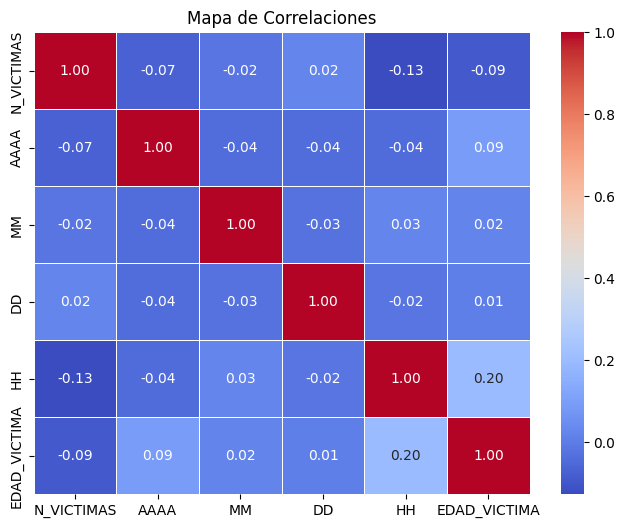

In [24]:
# Filtramos variables numéricas:
correlation_matrix = homicidios_df[["N_VICTIMAS", "AAAA", "MM", "DD", "HH", "EDAD_VICTIMA"]].corr()

# Creamos un mapa de correlaciones:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlaciones")
plt.show()

Observamos que no existe ninguna alta correlación entre las variables numéricas. La mayor correlación existente es entre la hora en la que ocurrió el siniestro, y la edad de la víctima.

- **Buscamos outliers con un Boxplot de los datos numéricos:**

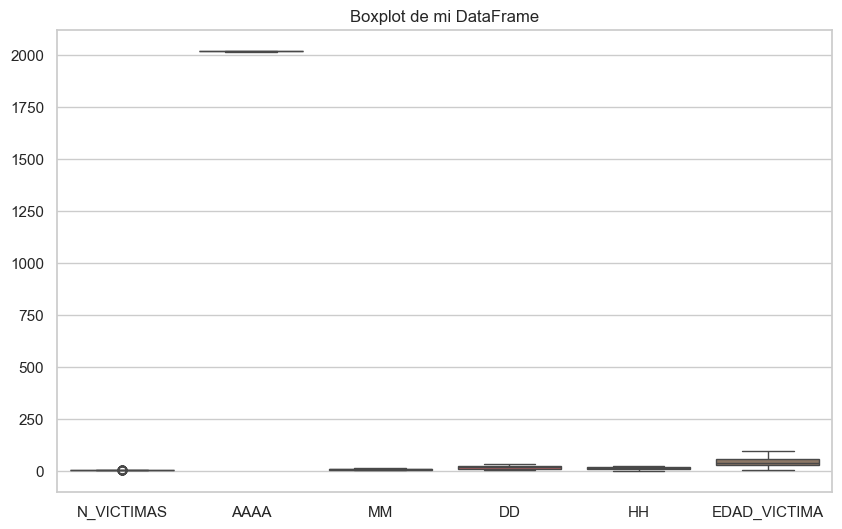

In [25]:
# Creamos el Boxplot:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=homicidios_df)
plt.title('Boxplot de mi DataFrame')
plt.show()

Nuevamente, no encontramos valores atípicos u outliers.

- **Distribución de la cantidad de siniestros registrados, segun tipo de calle:**

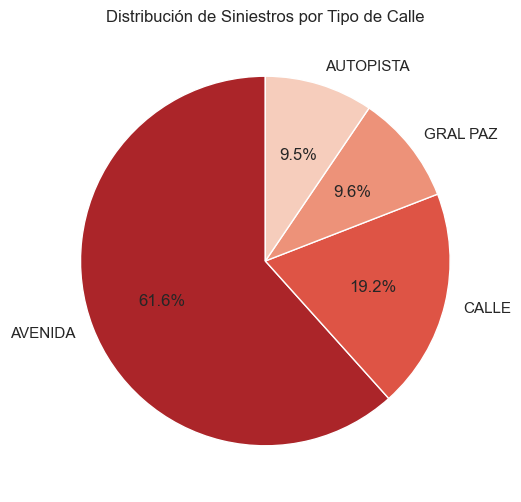

In [26]:
# Contamos las ocurrencias de cada tipo de calle:
conteo_categorias = homicidios_df["TIPO_DE_CALLE"].value_counts()

# Creamos un gráfico de torta:
plt.figure(figsize=(8, 6))
sns.set_palette(sns.color_palette("Reds_r", n_colors=len(conteo_categorias), desat=0.8))
plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Siniestros por Tipo de Calle")
plt.show()


Podemos ver que la mayor cantidad de accidentes ocurre en avenidas (arteria cuya calzada tiene un ancho total de por lo menos 13 metros).

- **Cantidad total de homicidios por tipo de Acusado, y a qué tipos de Víctima:**

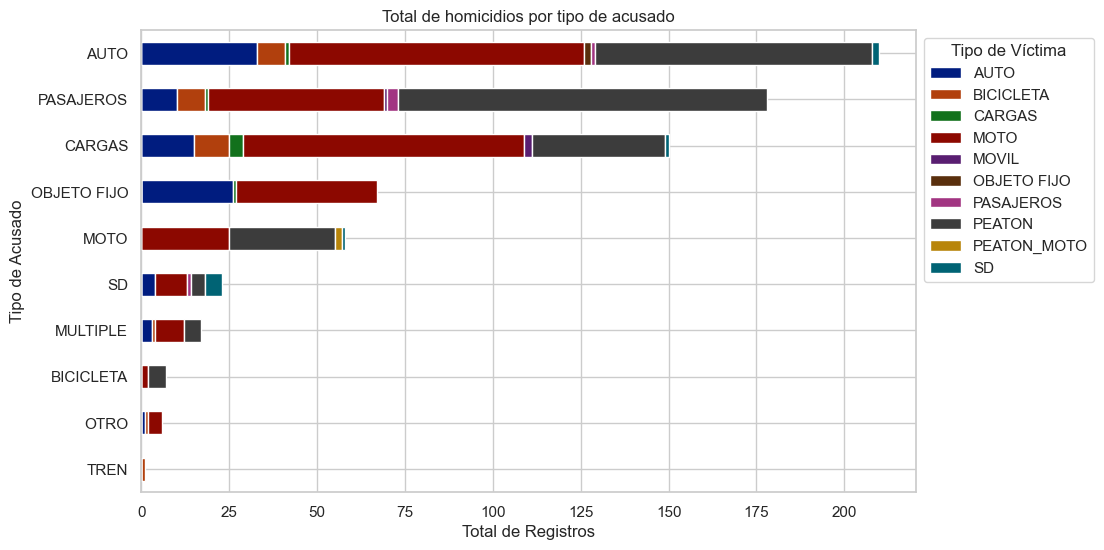

In [27]:
# Calculamos el total de registros para cada tipo de acusado y víctima:
df_grouped = homicidios_df.groupby(["ACUSADO", "VICTIMA"]).size().unstack(fill_value=0)

# Calculamos la suma de cada fila y ordenamos el DataFrame en función de esa suma:
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=True).index]

# Creamos el gráfico de barras apiladas:
palette = sns.color_palette("dark", n_colors=len(df_grouped.columns))
ax = df_grouped.plot(kind="barh", stacked=True, figsize=(10, 6), color=palette)
plt.title("Total de homicidios por tipo de acusado")
plt.xlabel("Total de Registros")
plt.ylabel("Tipo de Acusado")
plt.legend(title="Tipo de Víctima", bbox_to_anchor=(1, 1))
plt.show()

Podemos ver que la mayor cantidad de homicidios está constituida por autos, cuyas víctimas son mayormente motocicletas y peatones.

- **Cantidad total de homicidios a cada tipo de Víctima, y por qué tipos de Acusado:**

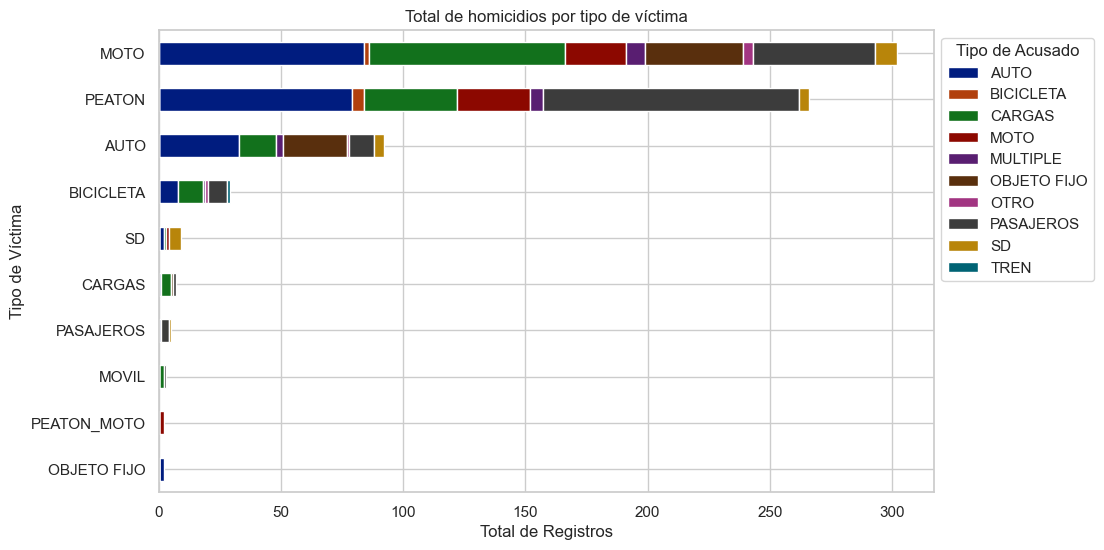

In [28]:
# Calculamos el total de registros para cada tipo de víctima y acusado:
df_grouped = homicidios_df.groupby(["VICTIMA", "ACUSADO"]).size().unstack(fill_value=0)

# Calculamos la suma de cada fila y ordenamos el DataFrame en función de esa suma:
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=True).index]

# Creamos el gráfico de barras apiladas:
dark_palette = sns.color_palette("dark", n_colors=len(df_grouped.columns))
ax = df_grouped.plot(kind="barh", stacked=True, figsize=(10, 6), color=dark_palette)
plt.title("Total de homicidios por tipo de víctima")
plt.xlabel("Total de Registros")
plt.ylabel("Tipo de Víctima")
plt.legend(title="Tipo de Acusado", bbox_to_anchor=(1, 1))
plt.show()

El gráfico nos muestra que el tipo de víctima más recurrente son las motocicletas, accidentadas mayormente por autos y vehículos de carga. Seguido por los peatones, accidentados mayormente por autos y pasajeros (personas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros y ómnibus de larga distancia).

- **Las 25 calles con mayor cantidad de siniestros viales fatales:**

In [29]:
# Visualizamos la cantidad de calles presentes en el DataFrame:
len(homicidios_df["Calle"].unique())

280

In [30]:
# Contamos las 25 calles con mayor cantidad de accidentes:
homicidios_df["Calle"].value_counts().head(25)

Calle
PAZ, GRAL. AV.                                61
RIVADAVIA AV.                                 20
DEL LIBERTADOR AV.                            19
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
AUTOPISTA PERITO MORENO                       13
AUTOPISTA 25 DE MAYO                          12
CORRIENTES AV.                                11
SAN MARTIN AV.                                11
CORDOBA AV.                                   10
DIRECTORIO AV.                                 9
PERON, EVA AV.                                 9
JUSTO, JUAN B. AV.                             9
27 DE FEBRERO AV.                              8
AUTOPISTA DELLEPIANE LUIS TTE. GRAL.           8
LA PLATA AV.                                   8
FERNANDEZ DE LA CRUZ, F., GRAL. AV.            8
MORENO, PERITO AV.                             8
ENTRE RIOS AV.                                 8
LUGONES, LEOPOLDO AV.                          7
INDEPENDENCIA 

Las 3 calles con mayor cantidad de siniestros viales fatales son Avenida General Paz, Avenida rivadavia, Avenida del Libertador.

- **Conteo de homicidios por año y mes:**

In [31]:
# Contamos la cantidad de accidentes en cada año:
homicidios_df["AAAA"].value_counts()

AAAA
2018    149
2016    146
2017    140
2019    104
2021     97
2020     81
Name: count, dtype: int64

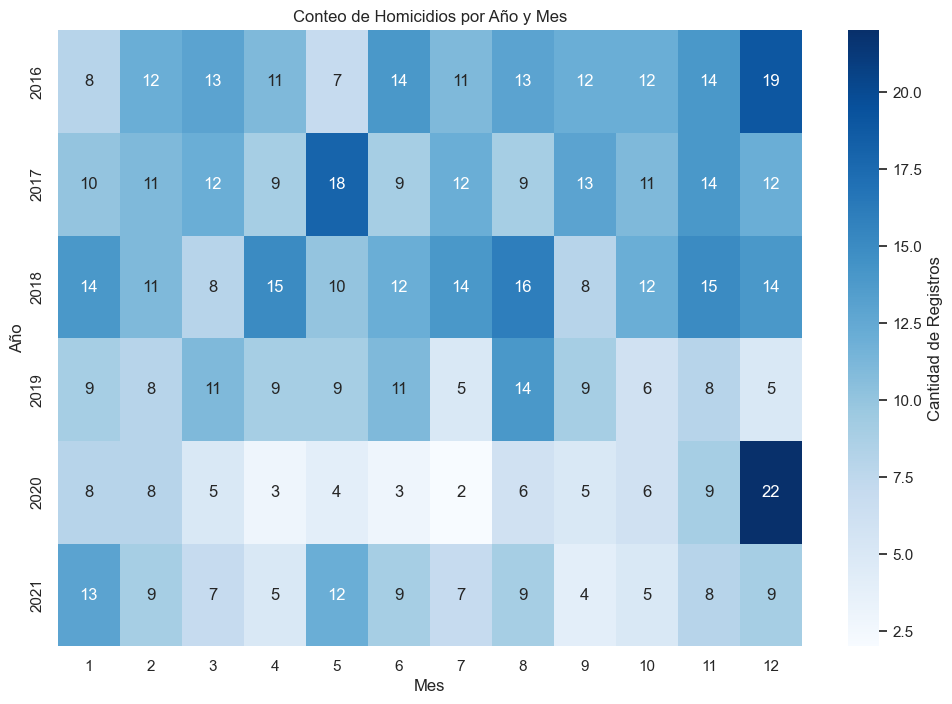

In [32]:
# Agrupamos por año y mes y contamos la cantidad de registros:
conteo_registros = homicidios_df.groupby(['AAAA', 'MM']).size().unstack()

# Graficamos el conteo de registros por año y mes:
plt.figure(figsize=(12, 8))
sns.heatmap(conteo_registros, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Cantidad de Registros'})
plt.title('Conteo de Homicidios por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

A simple vista podemos observar que en 2020 se redujo considerablemente la cantidad de siniestros. Probablemente esto fue causado por la reducción de la circulación debido al aislamiento social preventivo obligatorio.

- **Distribución por sexo y edad de las víctimas:**

In [33]:
# Averiguamos la cantidad de víctimas de cada sexo:
homicidios_df["SEXO_VICTIMA"].value_counts()

SEXO_VICTIMA
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

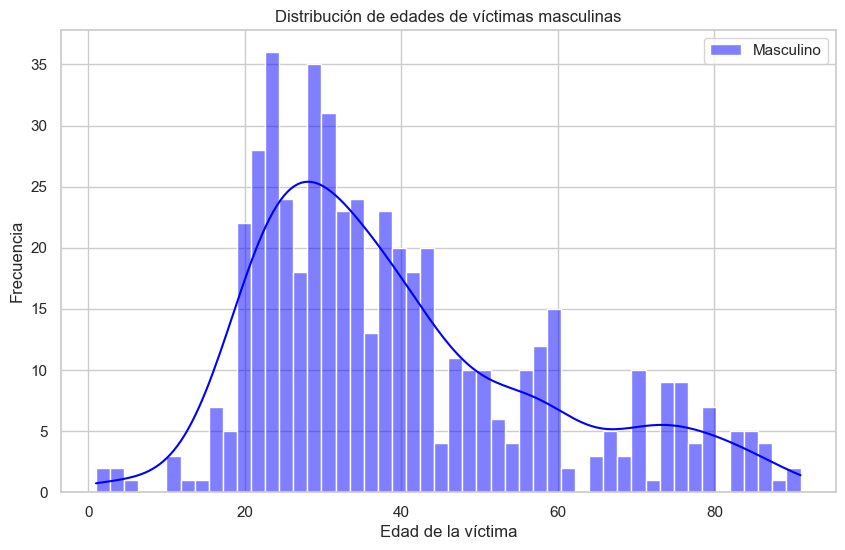

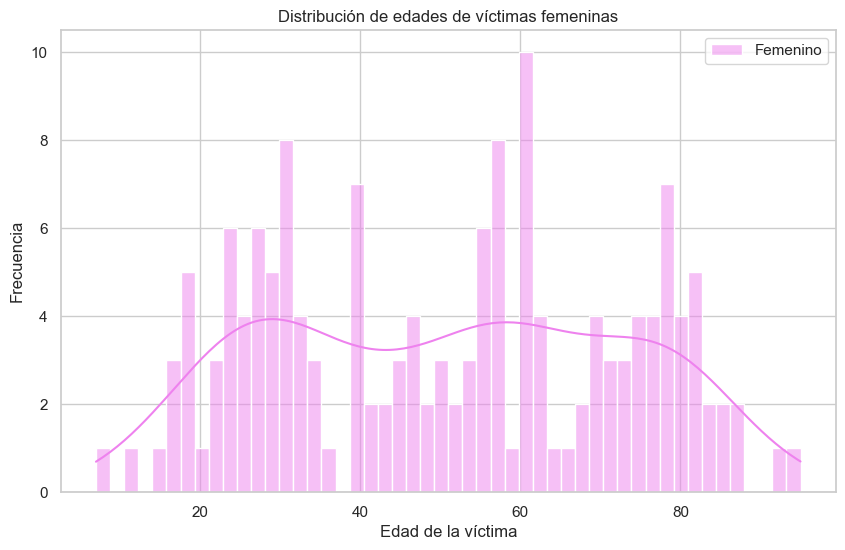

In [34]:
# Filtramos por género:
hombres_df = homicidios_df[homicidios_df["SEXO_VICTIMA"] == "MASCULINO"]
mujeres_df = homicidios_df[homicidios_df["SEXO_VICTIMA"] == "FEMENINO"]

# Histograma para edad de víctimas masculinas:
plt.figure(figsize=(10, 6))
sns.histplot(hombres_df["EDAD_VICTIMA"], bins=50, kde=True, color='blue', label='Masculino')
plt.title("Distribución de edades de víctimas masculinas")
plt.xlabel("Edad de la víctima")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Histograma para edad de víctimas femeninas:
plt.figure(figsize=(10, 6))
sns.histplot(mujeres_df["EDAD_VICTIMA"], bins=50, kde=True, color='violet', label='Femenino')
plt.title("Distribución de edades de víctimas femeninas")
plt.xlabel("Edad de la víctima")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Podemos observar que el 76.7% de las víctimas son hombres y el 23.3% son mujeres. La mayoría de víctimas masculinas suelen rondar entre los 20 y 40 años de edad. En cuanto a las víctimas femeninas, las edades están mas distribuidas, rondando entre los 20 y los 80 años.

- **Rol que ocupaban las víctimas al momento del siniestro:**

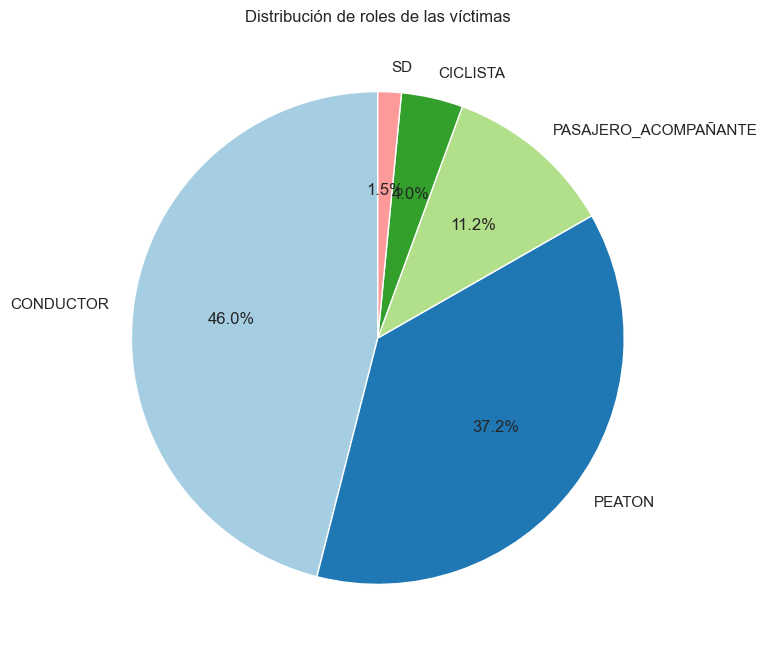

In [35]:
# Contar la frecuencia de cada rol de víctima
rol_counts = homicidios_df['ROL_VICTIMA'].value_counts()

# Configurar el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(rol_counts, labels=rol_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de roles de las víctimas")
plt.show()

El rol más presente en las víctimas es el de conductor con un 46% de las víctimas, seguido por peatones con un 37.2%, pasajeros/acompañantes con un 11.2% y ciclistas con un 4%. Se desconoce el rol del 1.5% restante de víctimas.